In [1]:
# Library
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Data Processing and Analysis
import os
import time
import pandas as pd
import numpy as np

# Machine Learning Models and Feature Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Deep Learning with TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Evaluation Metrics and Model Persistence
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import shap
import joblib
import pickle

# Data Visualization
import matplotlib.pyplot as plt

# PE (Portable Executable) File Processing
import pefile

# Progress Bar
from tqdm import tqdm

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\Obfuscated-MalMem2022\\Obfuscated-MalMem2022.csv") #DM--> Dataset Malware

In [3]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [4]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['Class'] == "Benign"]
MalwareData = DM[DM['Class'] == "Malware"]

In [5]:
# Histogram penyebaran data benign dan malware pada Category.
x = BenignData["Category"]
y = MalwareData["Category"]
bins = np.linspace(0, 10, 2) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Category")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()


KeyboardInterrupt



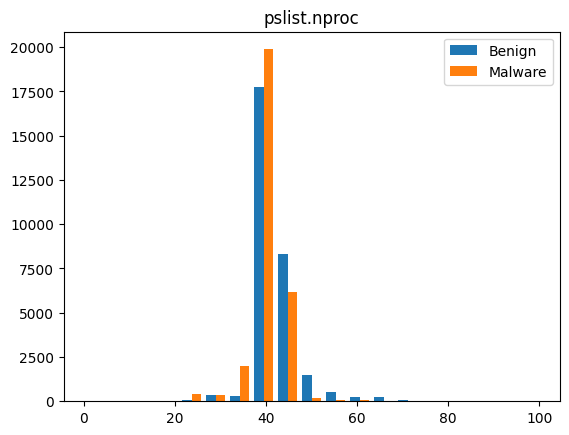

In [6]:
# Histogram penyebaran data benign dan malware pada Category.
x = BenignData["pslist.nproc"]
y = MalwareData["pslist.nproc"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pslist.nproc")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

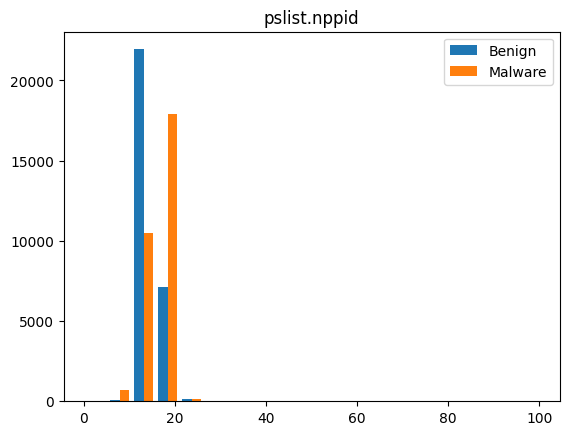

In [7]:
# Histogram penyebaran data benign dan malware pada pslist.nppid.
x = BenignData["pslist.nppid"]
y = MalwareData["pslist.nppid"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pslist.nppid")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

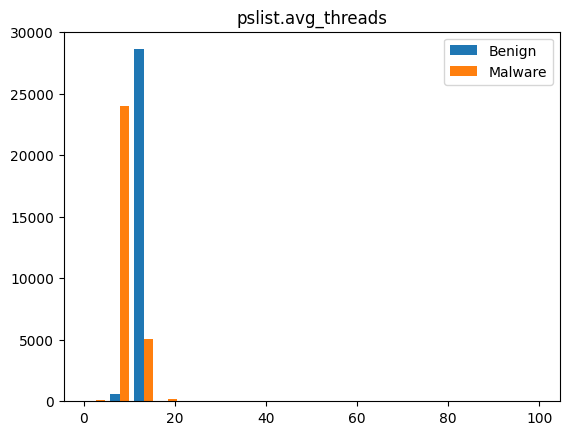

In [8]:
# Histogram penyebaran data benign dan malware pada pslist.avg_threads.
x = BenignData["pslist.avg_threads"]
y = MalwareData["pslist.avg_threads"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pslist.avg_threads")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

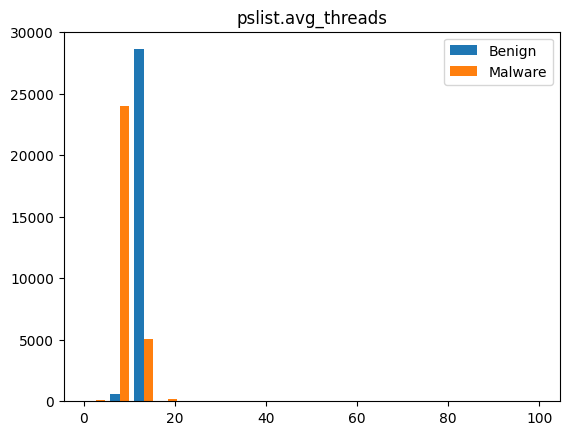

In [9]:
# Histogram penyebaran data benign dan malware pada pslist.avg_threads.
x = BenignData["pslist.avg_threads"]
y = MalwareData["pslist.avg_threads"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pslist.avg_threads")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

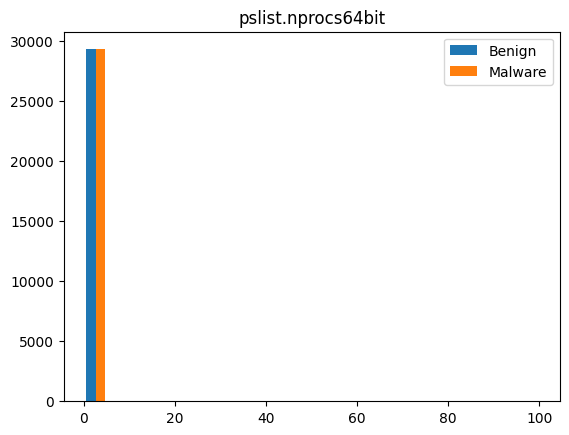

In [10]:
# Histogram penyebaran data benign dan malware pada pslist.nprocs64bit.
x = BenignData["pslist.nprocs64bit"]
y = MalwareData["pslist.nprocs64bit"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pslist.nprocs64bit")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

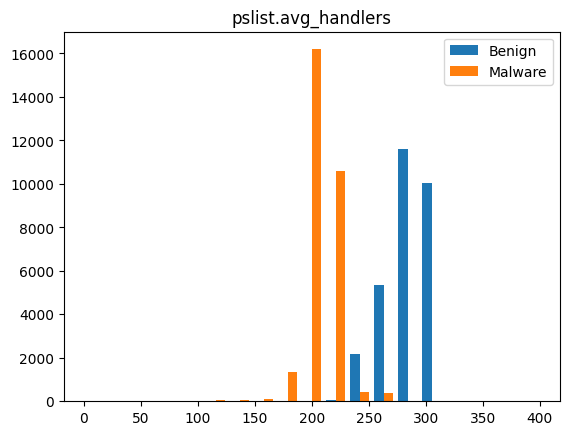

In [11]:
# Histogram penyebaran data benign dan malware pada pslist.avg_handlers.
x = BenignData["pslist.avg_handlers"]
y = MalwareData["pslist.avg_handlers"]
bins = np.linspace(0, 400, 20) # Berbeda karena mayoritas data bernilai 0 sampai 400, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pslist.avg_handlers")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

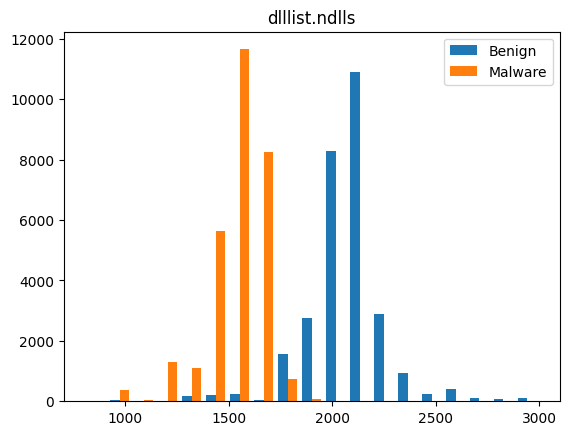

In [12]:
# Histogram penyebaran data benign dan malware pada dlllist.ndlls.
x = BenignData["dlllist.ndlls"]
y = MalwareData["dlllist.ndlls"]
bins = np.linspace(800, 3000, 20) # Berbeda karena mayoritas data bernilai 800 sampai 3000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("dlllist.ndlls")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

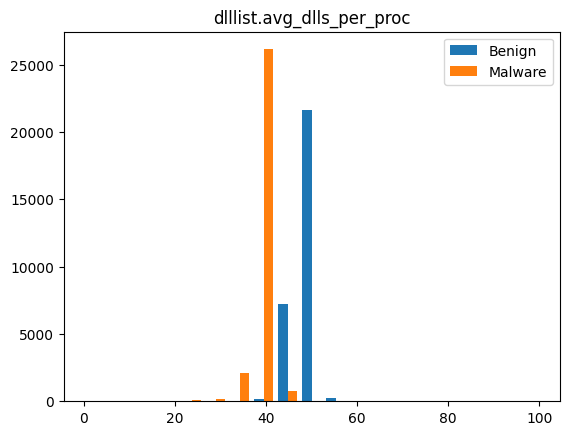

In [13]:
# Histogram penyebaran data benign dan malware pada dlllist.avg_dlls_per_proc.
x = BenignData["dlllist.avg_dlls_per_proc"]
y = MalwareData["dlllist.avg_dlls_per_proc"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("dlllist.avg_dlls_per_proc")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

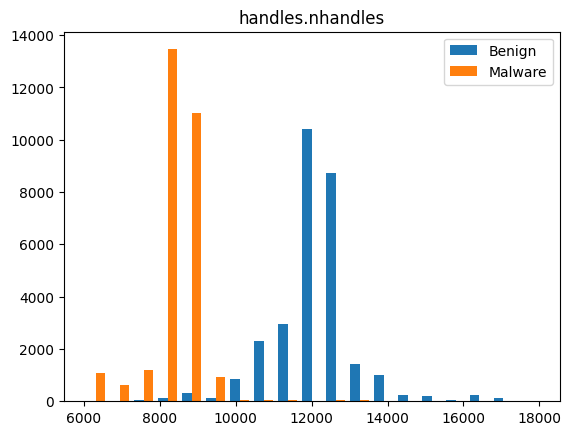

In [14]:
# Histogram penyebaran data benign dan malware pada handles.nhandles.
x = BenignData["handles.nhandles"]
y = MalwareData["handles.nhandles"]
bins = np.linspace(6000, 18000, 20) # Berbeda karena mayoritas data bernilai 6000 sampai 18000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nhandles")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

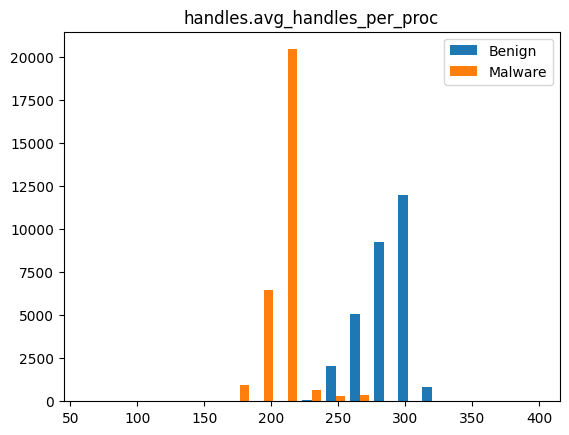

In [15]:
# Histogram penyebaran data benign dan malware pada handles.avg_handles_per_proc.
x = BenignData["handles.avg_handles_per_proc"]
y = MalwareData["handles.avg_handles_per_proc"]
bins = np.linspace(60, 400, 20) # Berbeda karena mayoritas data bernilai 60 sampai 400, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.avg_handles_per_proc")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

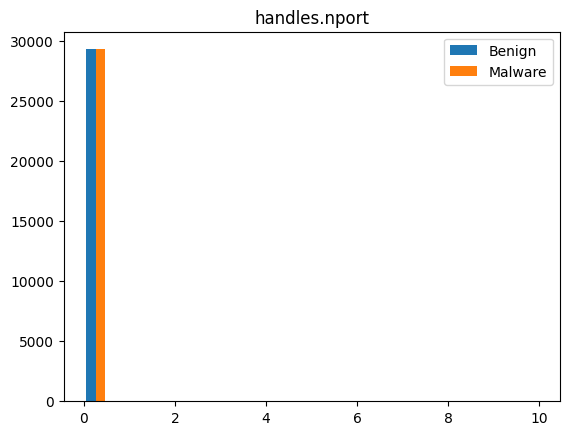

In [16]:
# Histogram penyebaran data benign dan malware pada handles.nport.
x = BenignData["handles.nport"]
y = MalwareData["handles.nport"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nport")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

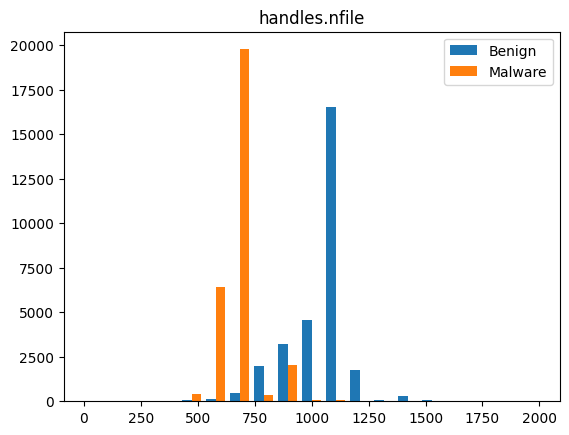

In [17]:
# Histogram penyebaran data benign dan malware pada handles.nfile.
x = BenignData["handles.nfile"]
y = MalwareData["handles.nfile"]
bins = np.linspace(0, 2000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nfile")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

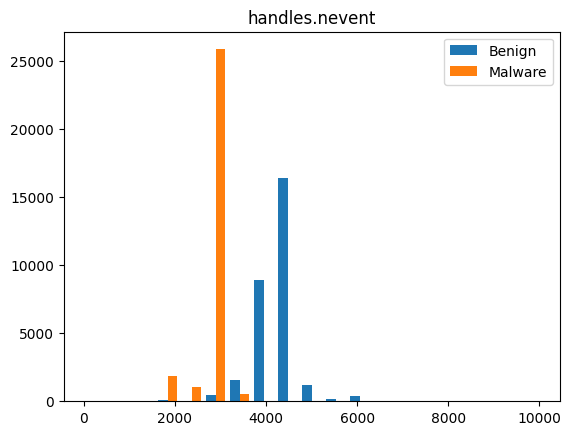

In [18]:
# Histogram penyebaran data benign dan malware pada handles.nevent.
x = BenignData["handles.nevent"]
y = MalwareData["handles.nevent"]
bins = np.linspace(0, 10000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nevent")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

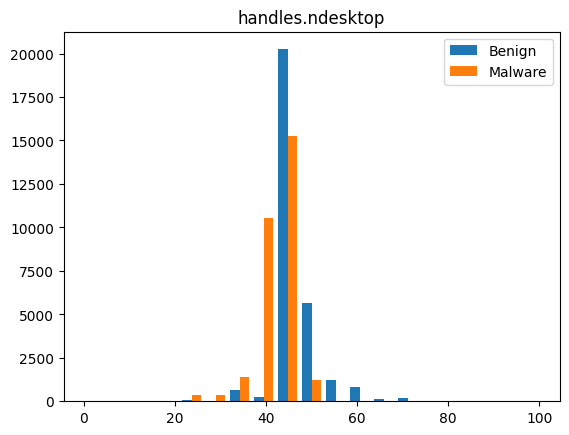

In [19]:
# Histogram penyebaran data benign dan malware pada handles.ndesktop.
x = BenignData["handles.ndesktop"]
y = MalwareData["handles.ndesktop"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.ndesktop")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

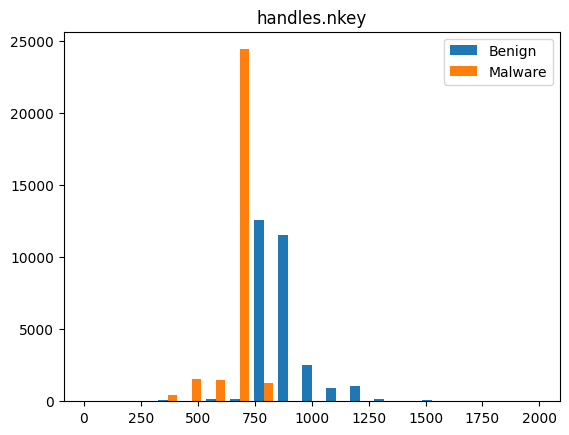

In [20]:
# Histogram penyebaran data benign dan malware pada handles.nkey.
x = BenignData["handles.nkey"]
y = MalwareData["handles.nkey"]
bins = np.linspace(0, 2000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nkey")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

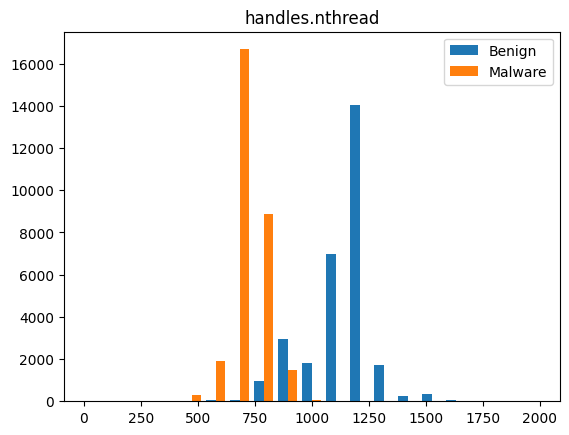

In [21]:
# Histogram penyebaran data benign dan malware pada handles.nthread.
x = BenignData["handles.nthread"]
y = MalwareData["handles.nthread"]
bins = np.linspace(0, 2000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 2000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nthread")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

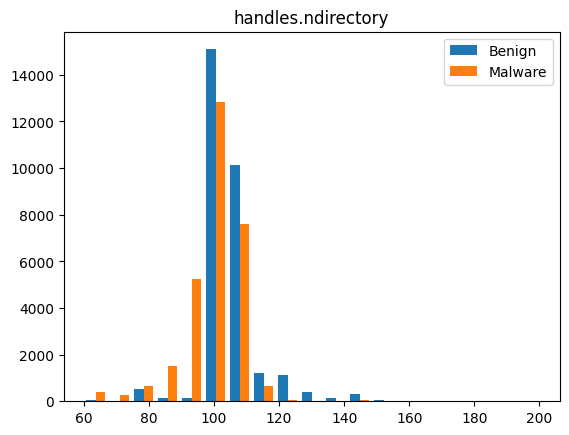

In [22]:
# Histogram penyebaran data benign dan malware pada handles.ndirectory.
x = BenignData["handles.ndirectory"]
y = MalwareData["handles.ndirectory"]
bins = np.linspace(60, 200, 20) # Berbeda karena mayoritas data bernilai 60 sampai 200, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.ndirectory")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

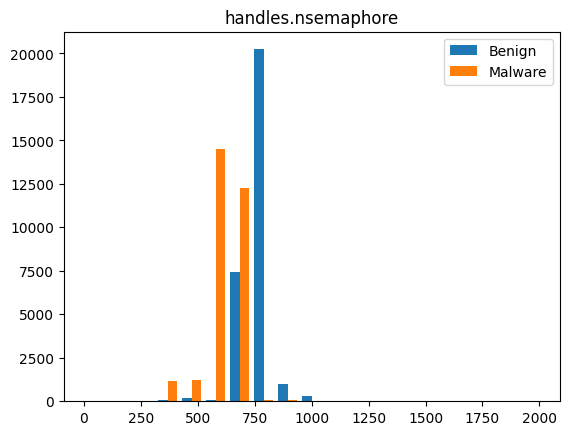

In [23]:
# Histogram penyebaran data benign dan malware pada handles.nsemaphore.
x = BenignData["handles.nsemaphore"]
y = MalwareData["handles.nsemaphore"]
bins = np.linspace(0, 2000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nsemaphore")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

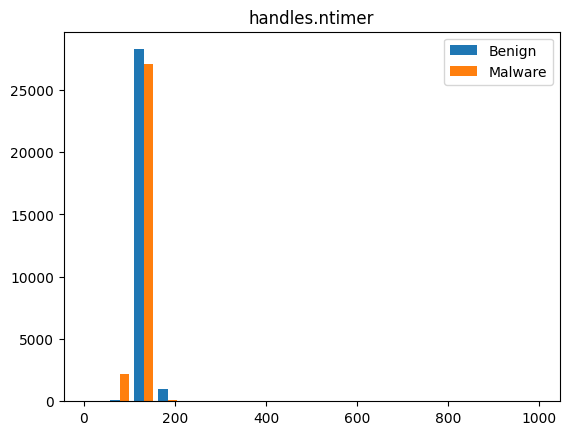

In [24]:
# Histogram penyebaran data benign dan malware pada handles.ntimer.
x = BenignData["handles.ntimer"]
y = MalwareData["handles.ntimer"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.ntimer")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

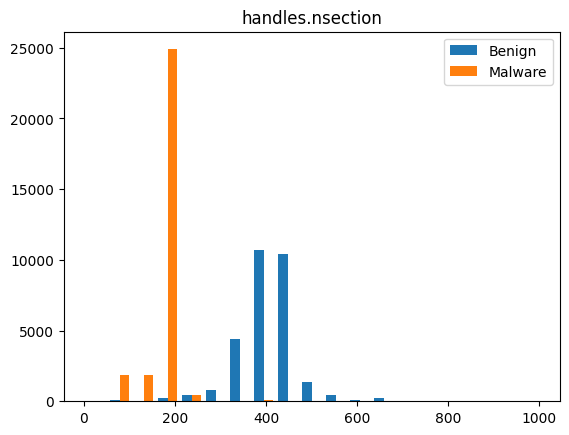

In [25]:
# Histogram penyebaran data benign dan malware pada handles.nsection.
x = BenignData["handles.nsection"]
y = MalwareData["handles.nsection"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nsection")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

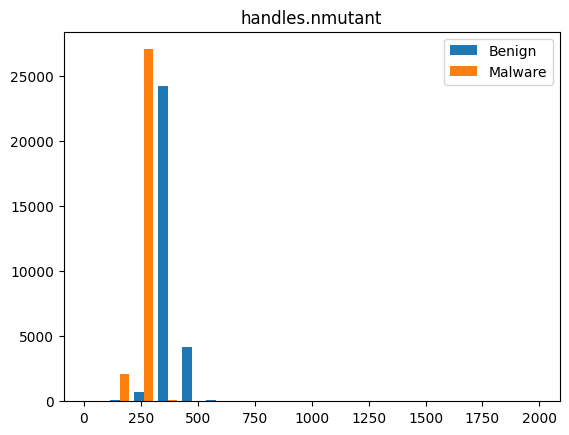

In [26]:
# Histogram penyebaran data benign dan malware pada handles.nmutant.
x = BenignData["handles.nmutant"]
y = MalwareData["handles.nmutant"]
bins = np.linspace(0, 2000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("handles.nmutant")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

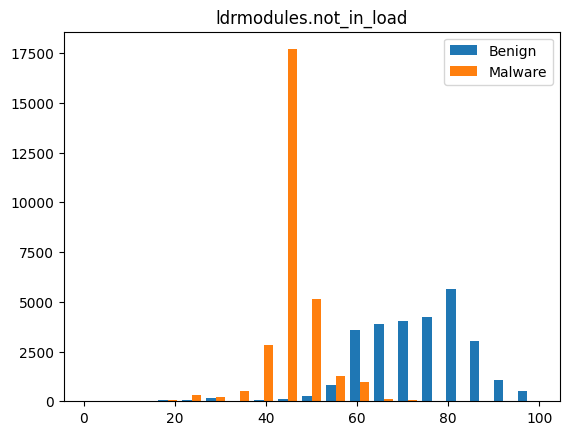

In [27]:
# Histogram penyebaran data benign dan malware pada ldrmodules.not_in_load.
x = BenignData["ldrmodules.not_in_load"]
y = MalwareData["ldrmodules.not_in_load"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ldrmodules.not_in_load")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

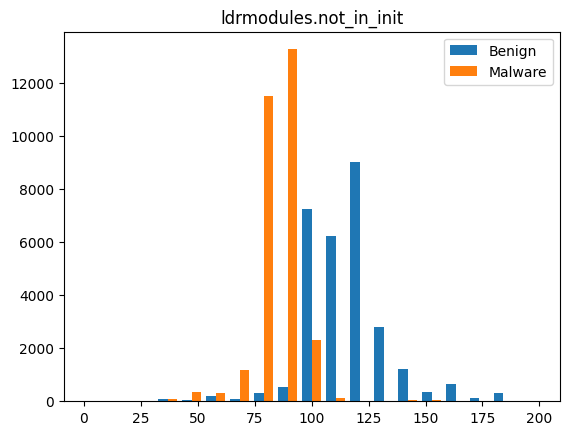

In [28]:
# Histogram penyebaran data benign dan malware pada ldrmodules.not_in_init.
x = BenignData["ldrmodules.not_in_init"]
y = MalwareData["ldrmodules.not_in_init"]
bins = np.linspace(0, 200, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ldrmodules.not_in_init")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

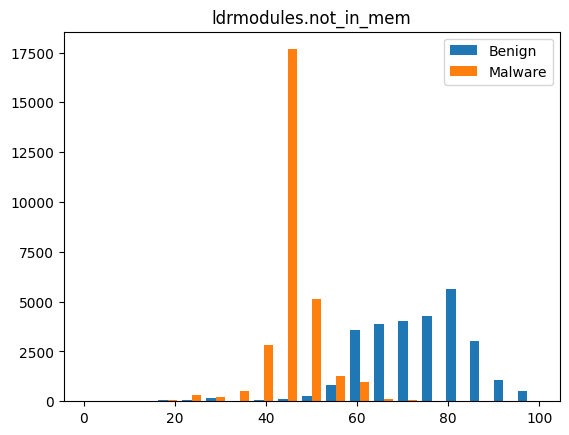

In [29]:
# Histogram penyebaran data benign dan malware pada ldrmodules.not_in_mem.
x = BenignData["ldrmodules.not_in_mem"]
y = MalwareData["ldrmodules.not_in_mem"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ldrmodules.not_in_mem")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

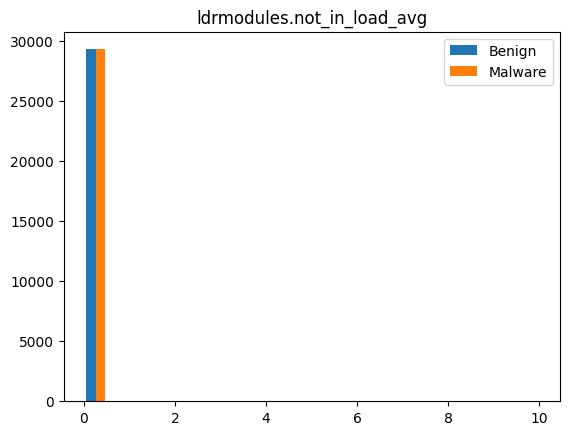

In [30]:
# Histogram penyebaran data benign dan malware pada ldrmodules.not_in_load_avg.
x = BenignData["ldrmodules.not_in_load_avg"]
y = MalwareData["ldrmodules.not_in_load_avg"]
bins = np.linspace(0, 10, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ldrmodules.not_in_load_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

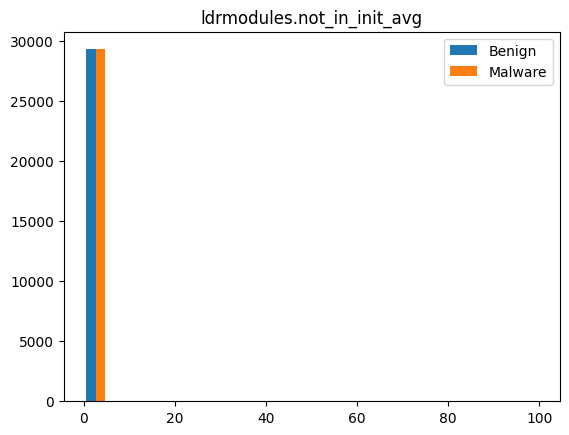

In [31]:
# Histogram penyebaran data benign dan malware pada ldrmodules.not_in_init_avg.
x = BenignData["ldrmodules.not_in_init_avg"]
y = MalwareData["ldrmodules.not_in_init_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ldrmodules.not_in_init_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

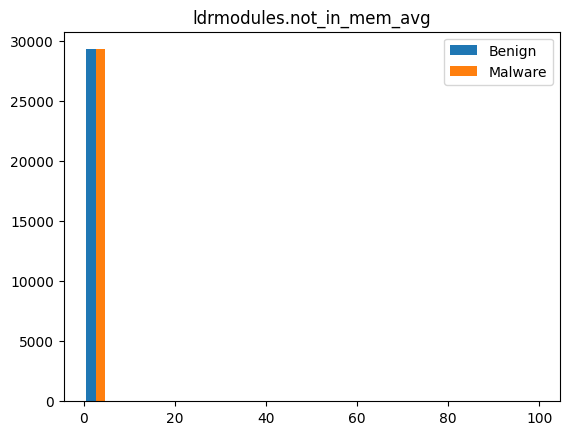

In [32]:
# Histogram penyebaran data benign dan malware pada ldrmodules.not_in_mem_avg.
x = BenignData["ldrmodules.not_in_mem_avg"]
y = MalwareData["ldrmodules.not_in_mem_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ldrmodules.not_in_mem_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

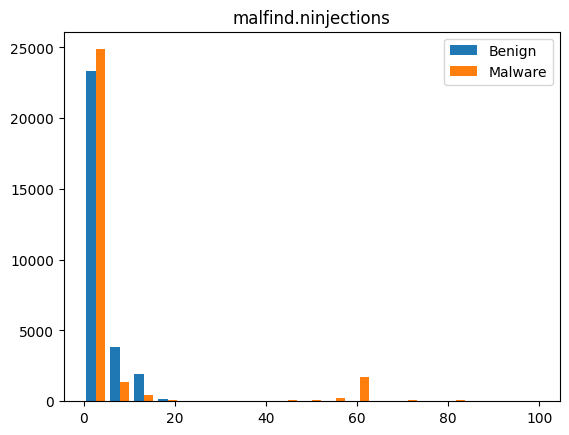

In [33]:
# Histogram penyebaran data benign dan malware pada malfind.ninjections.
x = BenignData["malfind.ninjections"]
y = MalwareData["malfind.ninjections"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("malfind.ninjections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

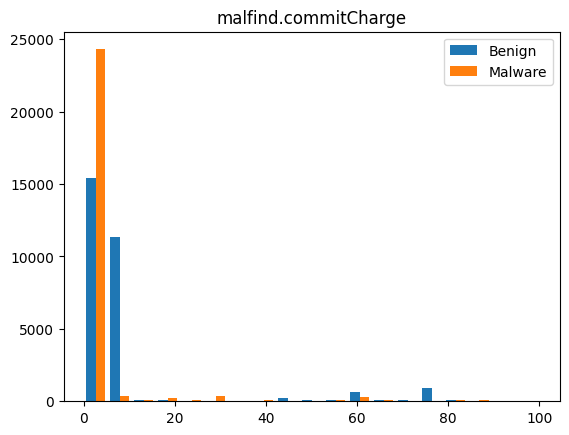

In [34]:
# Histogram penyebaran data benign dan malware pada malfind.commitCharge.
x = BenignData["malfind.commitCharge"]
y = MalwareData["malfind.commitCharge"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("malfind.commitCharge")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

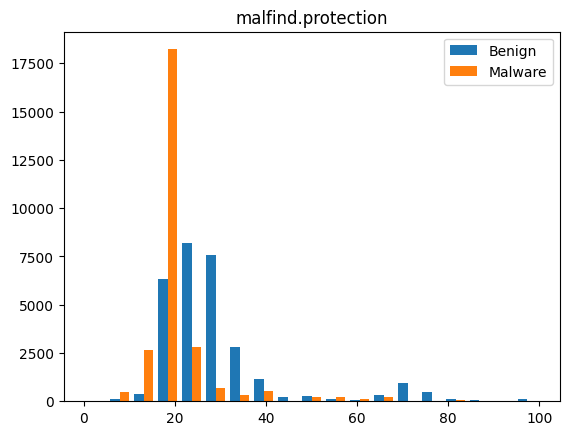

In [35]:
# Histogram penyebaran data benign dan malware pada malfind.protection.
x = BenignData["malfind.protection"]
y = MalwareData["malfind.protection"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("malfind.protection")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

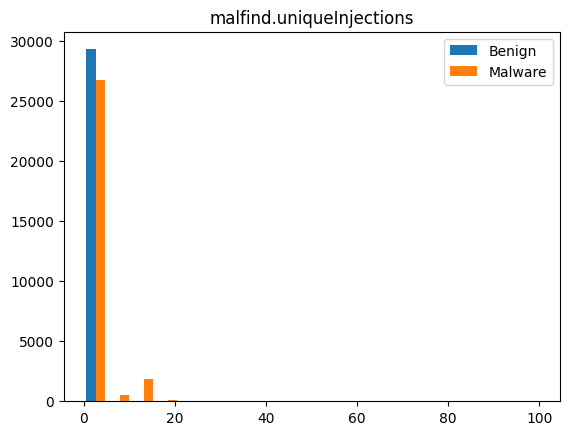

In [36]:
# Histogram penyebaran data benign dan malware pada malfind.uniqueInjections.
x = BenignData["malfind.uniqueInjections"]
y = MalwareData["malfind.uniqueInjections"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("malfind.uniqueInjections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

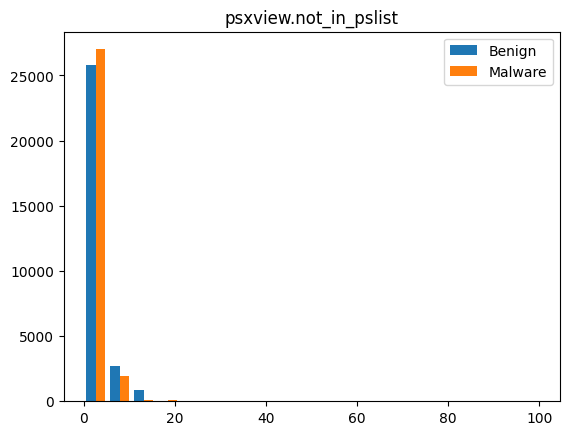

In [37]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_pslist.
x = BenignData["psxview.not_in_pslist"]
y = MalwareData["psxview.not_in_pslist"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_pslist")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

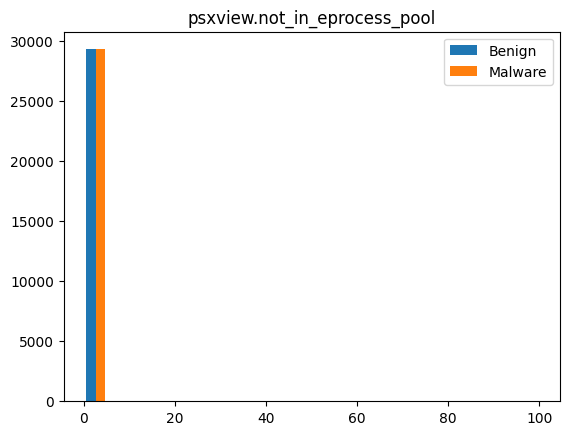

In [38]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_eprocess_pool.
x = BenignData["psxview.not_in_eprocess_pool"]
y = MalwareData["psxview.not_in_eprocess_pool"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_eprocess_pool")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

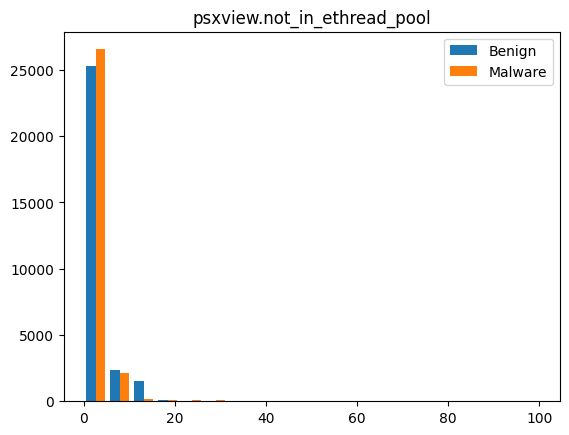

In [39]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_ethread_pool.
x = BenignData["psxview.not_in_ethread_pool"]
y = MalwareData["psxview.not_in_ethread_pool"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_ethread_pool")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

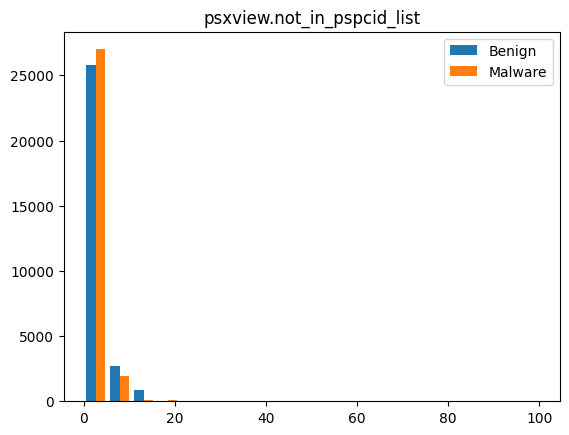

In [40]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_pspcid_list.
x = BenignData["psxview.not_in_pspcid_list"]
y = MalwareData["psxview.not_in_pspcid_list"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_pspcid_list")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

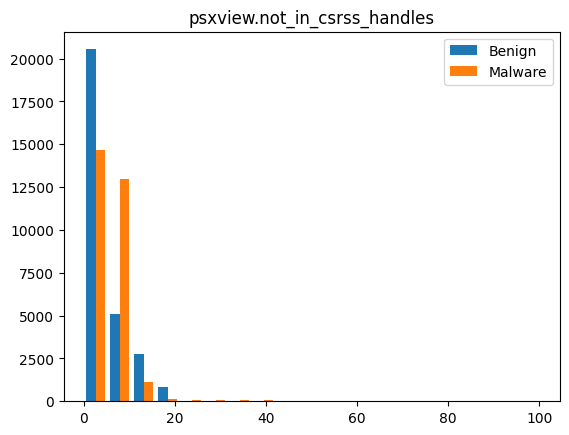

In [41]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_csrss_handles.
x = BenignData["psxview.not_in_csrss_handles"]
y = MalwareData["psxview.not_in_csrss_handles"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_csrss_handles")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

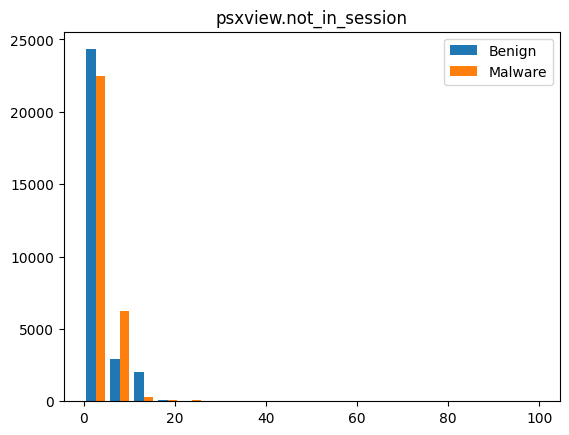

In [42]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_session.
x = BenignData["psxview.not_in_session"]
y = MalwareData["psxview.not_in_session"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_session")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

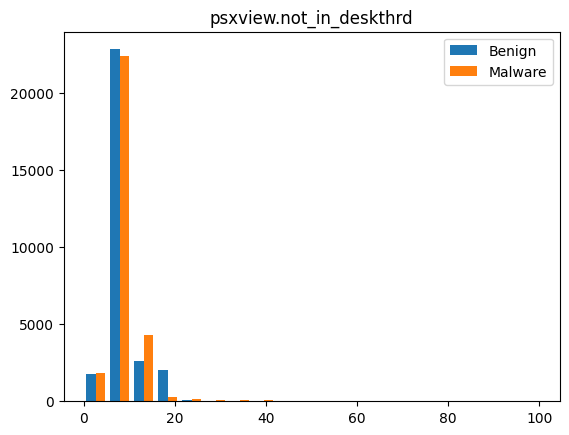

In [43]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_deskthrd.
x = BenignData["psxview.not_in_deskthrd"]
y = MalwareData["psxview.not_in_deskthrd"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_deskthrd")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

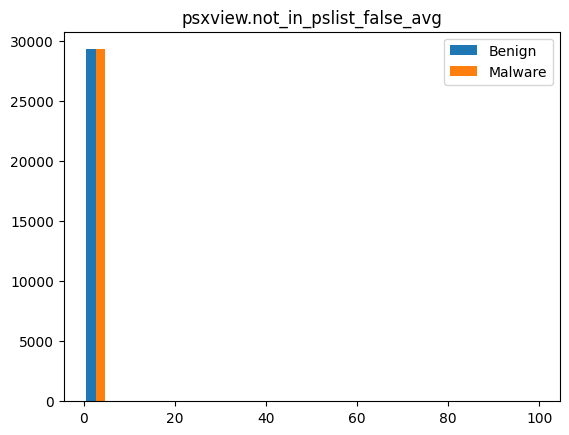

In [44]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_pslist_false_avg.
x = BenignData["psxview.not_in_pslist_false_avg"]
y = MalwareData["psxview.not_in_pslist_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_pslist_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

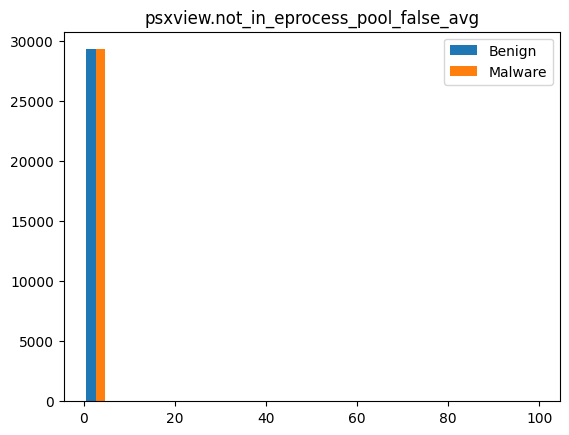

In [45]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_eprocess_pool_false_avg.
x = BenignData["psxview.not_in_eprocess_pool_false_avg"]
y = MalwareData["psxview.not_in_eprocess_pool_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_eprocess_pool_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

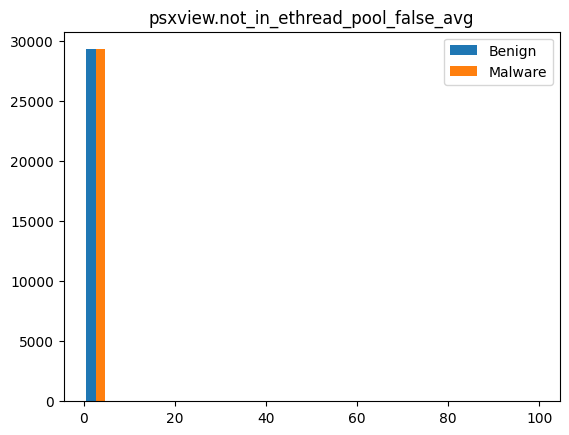

In [46]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_ethread_pool_false_avg.
x = BenignData["psxview.not_in_ethread_pool_false_avg"]
y = MalwareData["psxview.not_in_ethread_pool_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_ethread_pool_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

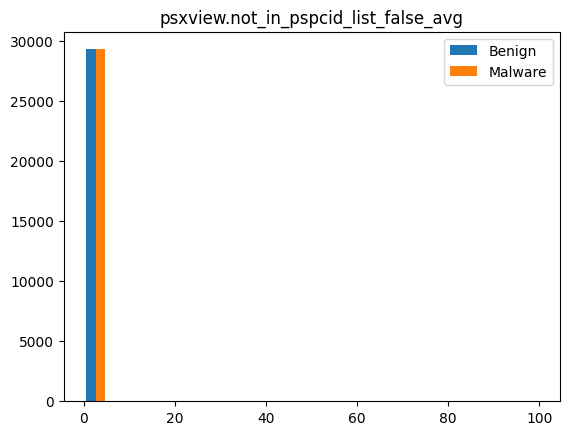

In [47]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_pspcid_list_false_avg.
x = BenignData["psxview.not_in_pspcid_list_false_avg"]
y = MalwareData["psxview.not_in_pspcid_list_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_pspcid_list_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

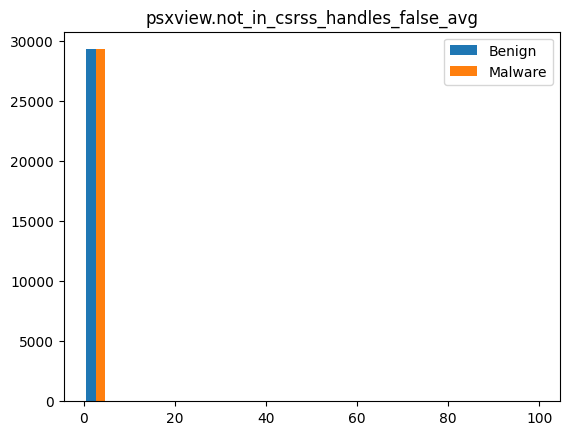

In [48]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_csrss_handles_false_avg.
x = BenignData["psxview.not_in_csrss_handles_false_avg"]
y = MalwareData["psxview.not_in_csrss_handles_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_csrss_handles_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

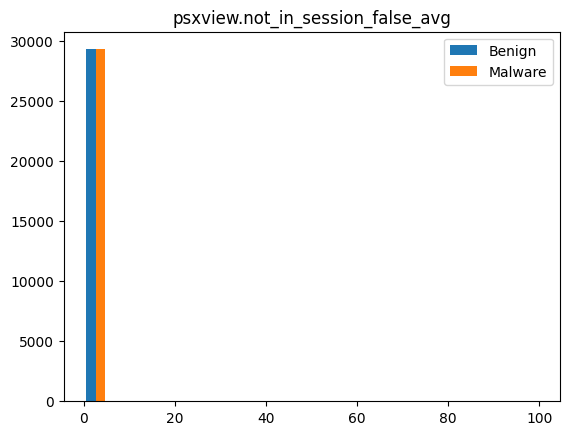

In [49]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_session_false_avg.
x = BenignData["psxview.not_in_session_false_avg"]
y = MalwareData["psxview.not_in_session_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_session_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

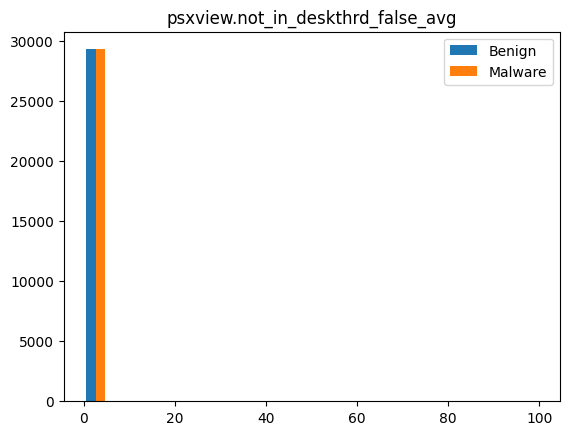

In [50]:
# Histogram penyebaran data benign dan malware pada psxview.not_in_deskthrd_false_avg.
x = BenignData["psxview.not_in_deskthrd_false_avg"]
y = MalwareData["psxview.not_in_deskthrd_false_avg"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("psxview.not_in_deskthrd_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

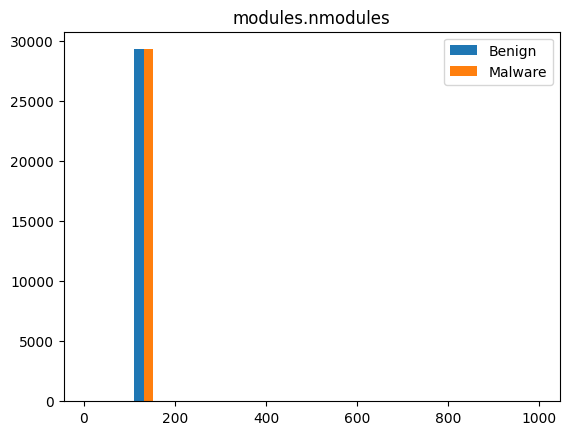

In [51]:
# Histogram penyebaran data benign dan malware pada modules.nmodules.
x = BenignData["modules.nmodules"]
y = MalwareData["modules.nmodules"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("modules.nmodules")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

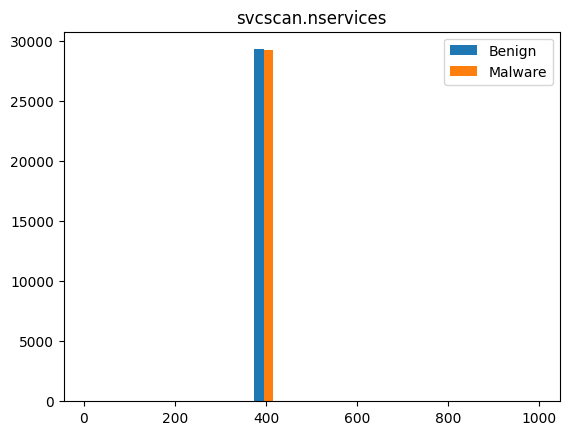

In [52]:
# Histogram penyebaran data benign dan malware pada svcscan.nservices.
x = BenignData["svcscan.nservices"]
y = MalwareData["svcscan.nservices"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.nservices")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

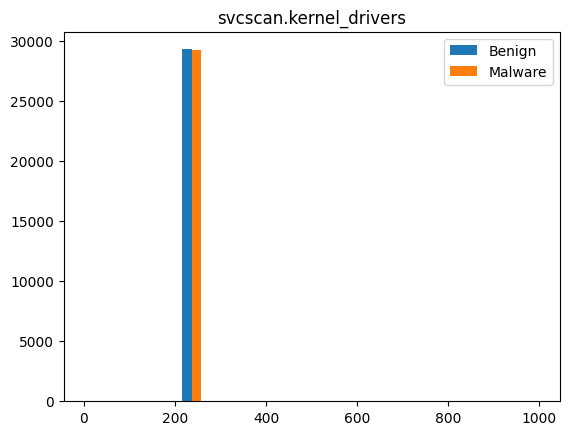

In [53]:
# Histogram penyebaran data benign dan malware pada svcscan.kernel_drivers.
x = BenignData["svcscan.kernel_drivers"]
y = MalwareData["svcscan.kernel_drivers"]
bins = np.linspace(0, 1000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.kernel_drivers")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

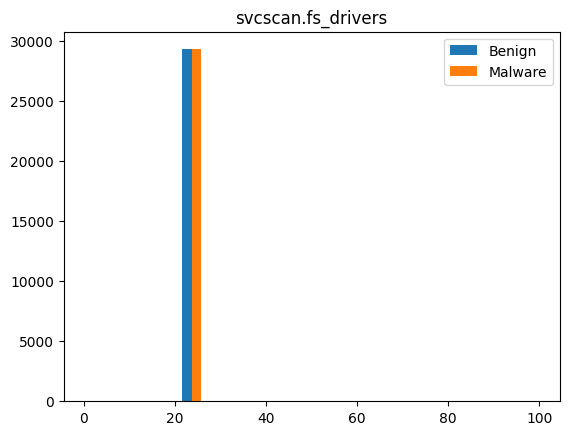

In [54]:
# Histogram penyebaran data benign dan malware pada svcscan.fs_drivers.
x = BenignData["svcscan.fs_drivers"]
y = MalwareData["svcscan.fs_drivers"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.fs_drivers")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

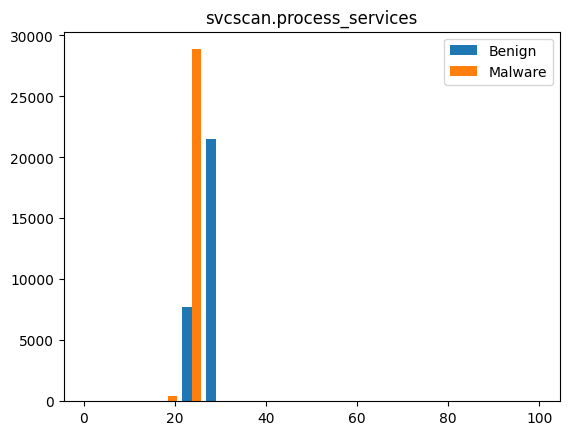

In [55]:
# Histogram penyebaran data benign dan malware pada svcscan.process_services.
x = BenignData["svcscan.process_services"]
y = MalwareData["svcscan.process_services"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

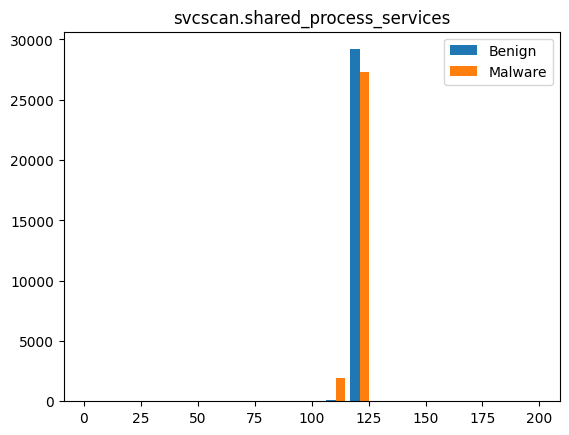

In [56]:
# Histogram penyebaran data benign dan malware pada svcscan.shared_process_services.
x = BenignData["svcscan.shared_process_services"]
y = MalwareData["svcscan.shared_process_services"]
bins = np.linspace(0, 200, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.shared_process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

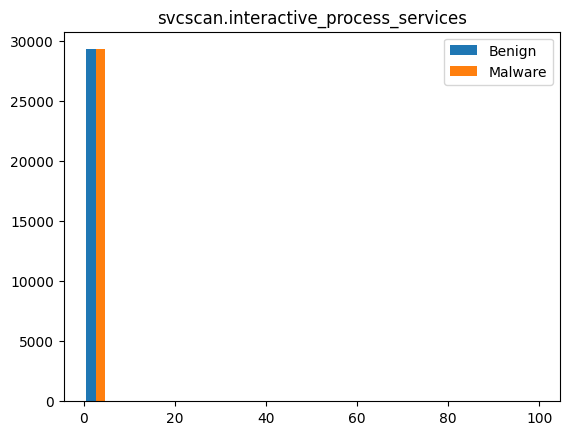

In [57]:
# Histogram penyebaran data benign dan malware pada svcscan.interactive_process_services.
x = BenignData["svcscan.interactive_process_services"]
y = MalwareData["svcscan.interactive_process_services"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.interactive_process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

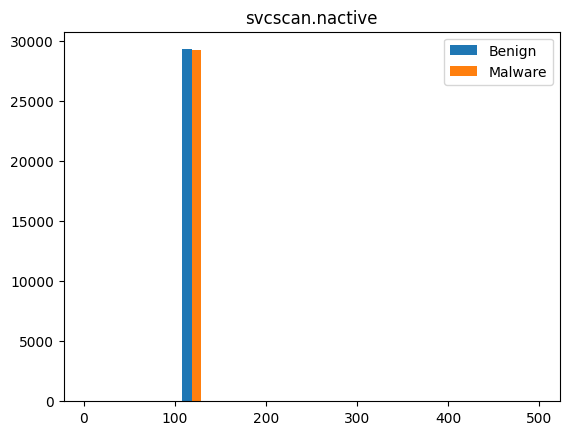

In [58]:
# Histogram penyebaran data benign dan malware pada svcscan.nactive.
x = BenignData["svcscan.nactive"]
y = MalwareData["svcscan.nactive"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("svcscan.nactive")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

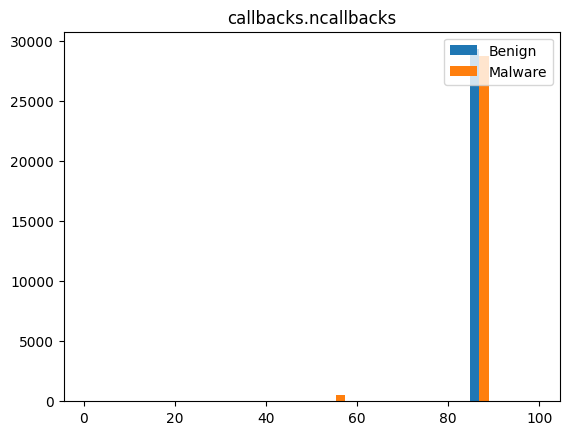

In [59]:
# Histogram penyebaran data benign dan malware pada callbacks.ncallbacks.
x = BenignData["callbacks.ncallbacks"]
y = MalwareData["callbacks.ncallbacks"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("callbacks.ncallbacks")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

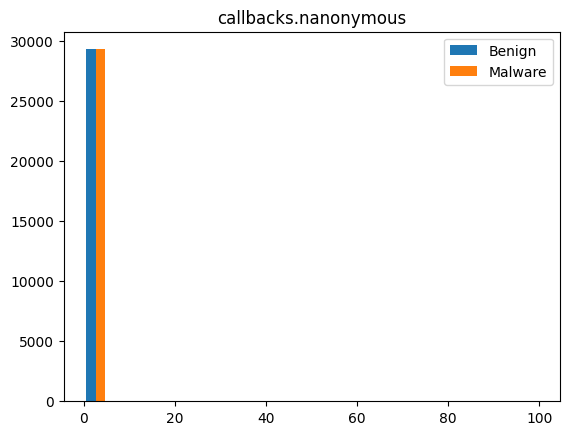

In [60]:
# Histogram penyebaran data benign dan malware pada callbacks.nanonymous.
x = BenignData["callbacks.nanonymous"]
y = MalwareData["callbacks.nanonymous"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("callbacks.nanonymous")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

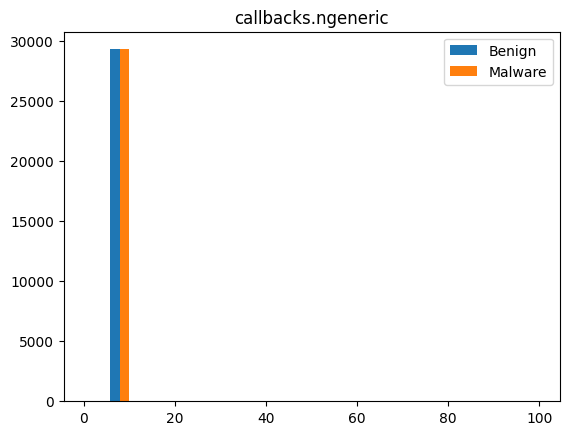

In [61]:
# Histogram penyebaran data benign dan malware pada callbacks.ngeneric.
x = BenignData["callbacks.ngeneric"]
y = MalwareData["callbacks.ngeneric"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("callbacks.ngeneric")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [62]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM[['pslist.avg_handlers','dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile', 'handles.nevent', 'handles.nkey', 'handles.nthread', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem']] # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM['Class'].values # CLass karena merepresentasikan binary class

In [63]:
# Memilih 100% data secara acak dari setiap fitur/column
sampled_data = DM.groupby('Class').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
hasil_threshold = []

C:\Users\Muhammad Raihan\AppData\Local\Temp\ipykernel_28348\3131084859.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = DM.groupby('Class').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)


In [64]:
# Menampilkan list feature yang digunakan
Feature = sampled_data[['pslist.avg_handlers','dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile', 'handles.nevent', 'handles.nkey', 'handles.nthread', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem']].columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")

features = []
for i, column_name in enumerate(Feature):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")
    features.append(column_name)

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1 pslist.avg_handlers                      58596           float64
  2 dlllist.ndlls                            58596           int64
  3 dlllist.avg_dlls_per_proc                58596           float64
  4 handles.nhandles                         58596           int64
  5 handles.avg_handles_per_proc             58596           float64
  6 handles.nfile                            58596           int64
  7 handles.nevent                           58596           int64
  8 handles.nkey                             58596           int64
  9 handles.nthread                          58596           int64
 10 handles.nsection                         58596           int64
 11 handles.nmutant                          585

In [65]:
# Pisahkan data menjadi training dan testing
X = sampled_data[['pslist.avg_handlers','dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile', 'handles.nevent', 'handles.nkey', 'handles.nthread', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem']]
y = sampled_data['Class'].values

In [66]:
# Hapus NaN
X = pd.DataFrame(X).dropna().values
y = y[pd.DataFrame(X).index]

In [67]:
# Hapus NaN
X = pd.DataFrame(X).dropna().values
y = y[pd.DataFrame(X).index]

In [70]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# Encode labels ke bentuk numerik jika diperlukan
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [73]:
# Inisialisasi variabel untuk menyimpan hasil evaluasi
hasil_ml_dl = []
hasil_ml_dl_xai = []

# Encode labels ke bentuk numerik jika diperlukan
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Function to evaluate ML/DL models
def EvaluateModel(model_name, model, X_train, y_train, X_test, y_test, use_xai=False, is_dl_model=False):
    start_time = time.time()
    
    # Train the model
    if is_dl_model:
        model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    else:
        model.fit(X_train, y_train)
    
    # Predict
    if is_dl_model:
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).ravel()
    elif hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] > 1:  # Multi-class classification model
            y_pred = np.argmax(y_pred_proba, axis=1)
        else:  # Binary classification model
            y_pred = (y_pred_proba > 0.5).astype(int).ravel()
    else:
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).ravel()

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    Precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    Recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    F1Score = 2 * ((Precision * Recall) / (Precision + Recall)) if (Precision + Recall) != 0 else 0
    Accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0

    # Calculate runtime
    run_time = time.time() - start_time

    # If XAI is required, add analysis with SHAP
    if use_xai:
        try:
            if is_dl_model:
                explainer = shap.DeepExplainer(model, X_train)
                shap_values = explainer.shap_values(X_test)
                shap_summary = np.mean(shap_values[0], axis=0)
            else:
                explainer = shap.Explainer(model.predict_proba, X_train)
                shap_values = explainer(X_test)
                shap_summary = shap_values.values.mean(axis=0)
        except Exception as e:
            print(f"Error using SHAP with {model_name}: {e}")
            shap_summary = None

        hasil_ml_dl_xai.append([model_name, Precision, Recall, F1Score, Accuracy, run_time, {'SHAP': shap_summary}])
    else:
        hasil_ml_dl.append([model_name, Precision, Recall, F1Score, Accuracy, run_time])

# Define ML and DL models to evaluate
model_ml_dl = {
    "DecisionTree": DecisionTreeClassifier(max_depth=10),
    "RandomForest": RandomForestClassifier(n_estimators=50),
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=10000),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000),
    "Stochastic Gradient Descent": SGDClassifier(loss='log_loss', random_state=42),
    "ADA Boost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100),
    "LightGBM": LGBMClassifier(n_estimators=100),
    "CatBoost": CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)
}

# Reshape data for DL models
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_dl = {
    "DNN": Sequential([
        Dense(128, input_shape=(X_train_dl.shape[1],), activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),# ERROR karena hanya 1 fitur
    #"CNN": Sequential([
    #    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_dl.shape[1], 1)),
    #    MaxPooling1D(pool_size=2),
    #    Flatten(),
    #    Dense(128, activation='relu'),
    #    Dense(1, activation='sigmoid')
    #]),
    "RNN": Sequential([
        LSTM(100, input_shape=(X_train_dl.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ]),
}

# Evaluate ML models without XAI
for model_name, model in model_ml_dl.items():
    EvaluateModel(model_name, model, X_train, y_train_encoded, X_test, y_test_encoded, use_xai=False)

# Evaluate DL models without XAI
for model_name, model in model_dl.items():
    EvaluateModel(model_name, model, X_train_dl, y_train_encoded, X_test_dl, y_test_encoded, use_xai=False, is_dl_model=True)

# Evaluate ML models with XAI
for model_name, model in model_ml_dl.items():
    EvaluateModel(model_name, model, X_train, y_train_encoded, X_test, y_test_encoded, use_xai=True)

# Evaluate DL models with XAI
for model_name, model in model_dl.items():
    EvaluateModel(model_name, model, X_train_dl, y_train_encoded, X_test_dl, y_test_encoded, use_xai=True, is_dl_model=True)

# Print results
print("\nHasil Evaluasi Model ML/DL tanpa XAI:")
for result in hasil_ml_dl:
    print(result)

print("\nHasil Evaluasi Model ML/DL dengan XAI (SHAP):")
for result in hasil_ml_dl_xai:
    print(result)

# Save evaluation results to CSV files
pd.DataFrame(hasil_ml_dl, columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Runtime']).to_csv('hasil_ml_dl_manual.csv', index=False)
pd.DataFrame(hasil_ml_dl_xai, columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Runtime', 'XAI']).to_csv('hasil_ml_dl_xai_manual.csv', index=False)

[LightGBM] [Info] Number of positive: 20469, number of negative: 20548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3236
[LightGBM] [Info] Number of data points in the train set: 41017, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499037 -> initscore=-0.003852
[LightGBM] [Info] Start training from score -0.003852
550/550 [==============================] - 1s 2ms/step


PermutationExplainer explainer: 17580it [02:25, 116.12it/s]                                                            
PermutationExplainer explainer: 17580it [48:57,  5.96it/s]                                                             
PermutationExplainer explainer: 17580it [04:55, 58.02it/s]                                                             
PermutationExplainer explainer: 17580it [05:47, 49.02it/s]                                                             
PermutationExplainer explainer: 17580it [04:09, 67.71it/s]                                                             
PermutationExplainer explainer: 17580it [03:30, 79.37it/s]                                                             
PermutationExplainer explainer: 17580it [3:42:48,  1.31it/s]                                                           
PermutationExplainer explainer: 17580it [15:05, 19.19it/s]                                                             
PermutationExplainer explainer: 17580it 

[LightGBM] [Info] Number of positive: 20469, number of negative: 20548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3236
[LightGBM] [Info] Number of data points in the train set: 41017, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499037 -> initscore=-0.003852
[LightGBM] [Info] Start training from score -0.003852


PermutationExplainer explainer: 17580it [22:22, 12.97it/s]                                                             
PermutationExplainer explainer: 17580it [1:06:01,  4.43it/s]                                                           


550/550 [==============================] - 0s 675us/step


C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.s

Error using SHAP with DNN: operands could not be broadcast together with shapes (41017,14) (41017,14,1) 
550/550 [==============================] - 2s 3ms/step


C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.s

Error using SHAP with RNN: in user code:

    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 244, in grad_graph  *
        out = self.model(shap_rAnD)
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 371, in custom_grad
        out = op_handlers[type_name](self, op, *grads) # we cut off the shap_ prefix before the lookup
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 663, in handler
        return linearity_with_excluded_handler(input_inds, explainer, op, *grads)
    File "C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\P